In [1]:
import torch

In [2]:
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])

n_samples = t_u.shape[0]
n_val = int(0.2*n_samples)
shuffled_index = torch.randperm(n_samples)

train_index = shuffled_index[:-n_val]
val_index = shuffled_index[-n_val:]

train_index, val_index

(tensor([ 2,  4,  9,  6,  1,  5, 10,  0,  3]), tensor([8, 7]))

In [3]:
train_t_u = t_u[train_index]
train_t_c = t_c[train_index]

val_t_u = t_u[val_index]
val_t_c = t_c[val_index]

train_t_un = train_t_u*0.1
val_t_un = val_t_u*0.1

In [7]:
def model(t_u, w1, w2, b):
    return w2*t_u**2+w1*t_u+b
def loss_fn(t_p, t_c):
    squared_error = (t_p-t_c)**2
    return squared_error.mean()

learning_rate = 1e-2
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
optimizer = torch.optim.Adam(params=[params], lr=learning_rate)

In [14]:
from torch import autograd
training_loss_list = list()
val_loss_list = list()
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs+1):
        train_t_p = model(train_t_u, *params) # 前向传播
        train_loss = loss_fn(train_t_p, train_t_c) # 计算损失
        
        with torch.no_grad():
            val_t_p = model(val_t_u, *params)
            val_loss = loss_fn(val_t_p, val_t_c)
        training_loss_list.append(train_loss)
        val_loss_list.append(val_loss)
        optimizer.zero_grad()
        train_loss.backward() # 反向传播
        optimizer.step()
        if epoch % 500 == 0:
            print('Epoch %d,Training Loss %f, Validation Loss %f' % (epoch, train_loss, val_loss))


In [15]:
# 这里我们使用归一化之后的t_un
training_loop(n_epochs=10000, optimizer=optimizer, params=params, 
    train_t_u=train_t_un, val_t_u=val_t_un,
    train_t_c=train_t_c, val_t_c=val_t_c)

Epoch 500,Training Loss 2.047982, Validation Loss 2.708092
Epoch 1000,Training Loss 2.047976, Validation Loss 2.715799
Epoch 1500,Training Loss 2.047974, Validation Loss 2.712756
Epoch 2000,Training Loss 2.047973, Validation Loss 2.712602
Epoch 2500,Training Loss 2.047974, Validation Loss 2.710702
Epoch 3000,Training Loss 2.047972, Validation Loss 2.712654
Epoch 3500,Training Loss 2.047974, Validation Loss 2.712666
Epoch 4000,Training Loss 2.047973, Validation Loss 2.712658
Epoch 4500,Training Loss 2.047972, Validation Loss 2.712717
Epoch 5000,Training Loss 2.047973, Validation Loss 2.712305
Epoch 5500,Training Loss 2.048214, Validation Loss 2.687468
Epoch 6000,Training Loss 2.048043, Validation Loss 2.726335
Epoch 6500,Training Loss 2.048003, Validation Loss 2.703791
Epoch 7000,Training Loss 2.047984, Validation Loss 2.707210
Epoch 7500,Training Loss 2.047974, Validation Loss 2.713851
Epoch 8000,Training Loss 2.047972, Validation Loss 2.712711
Epoch 8500,Training Loss 2.047973, Valida

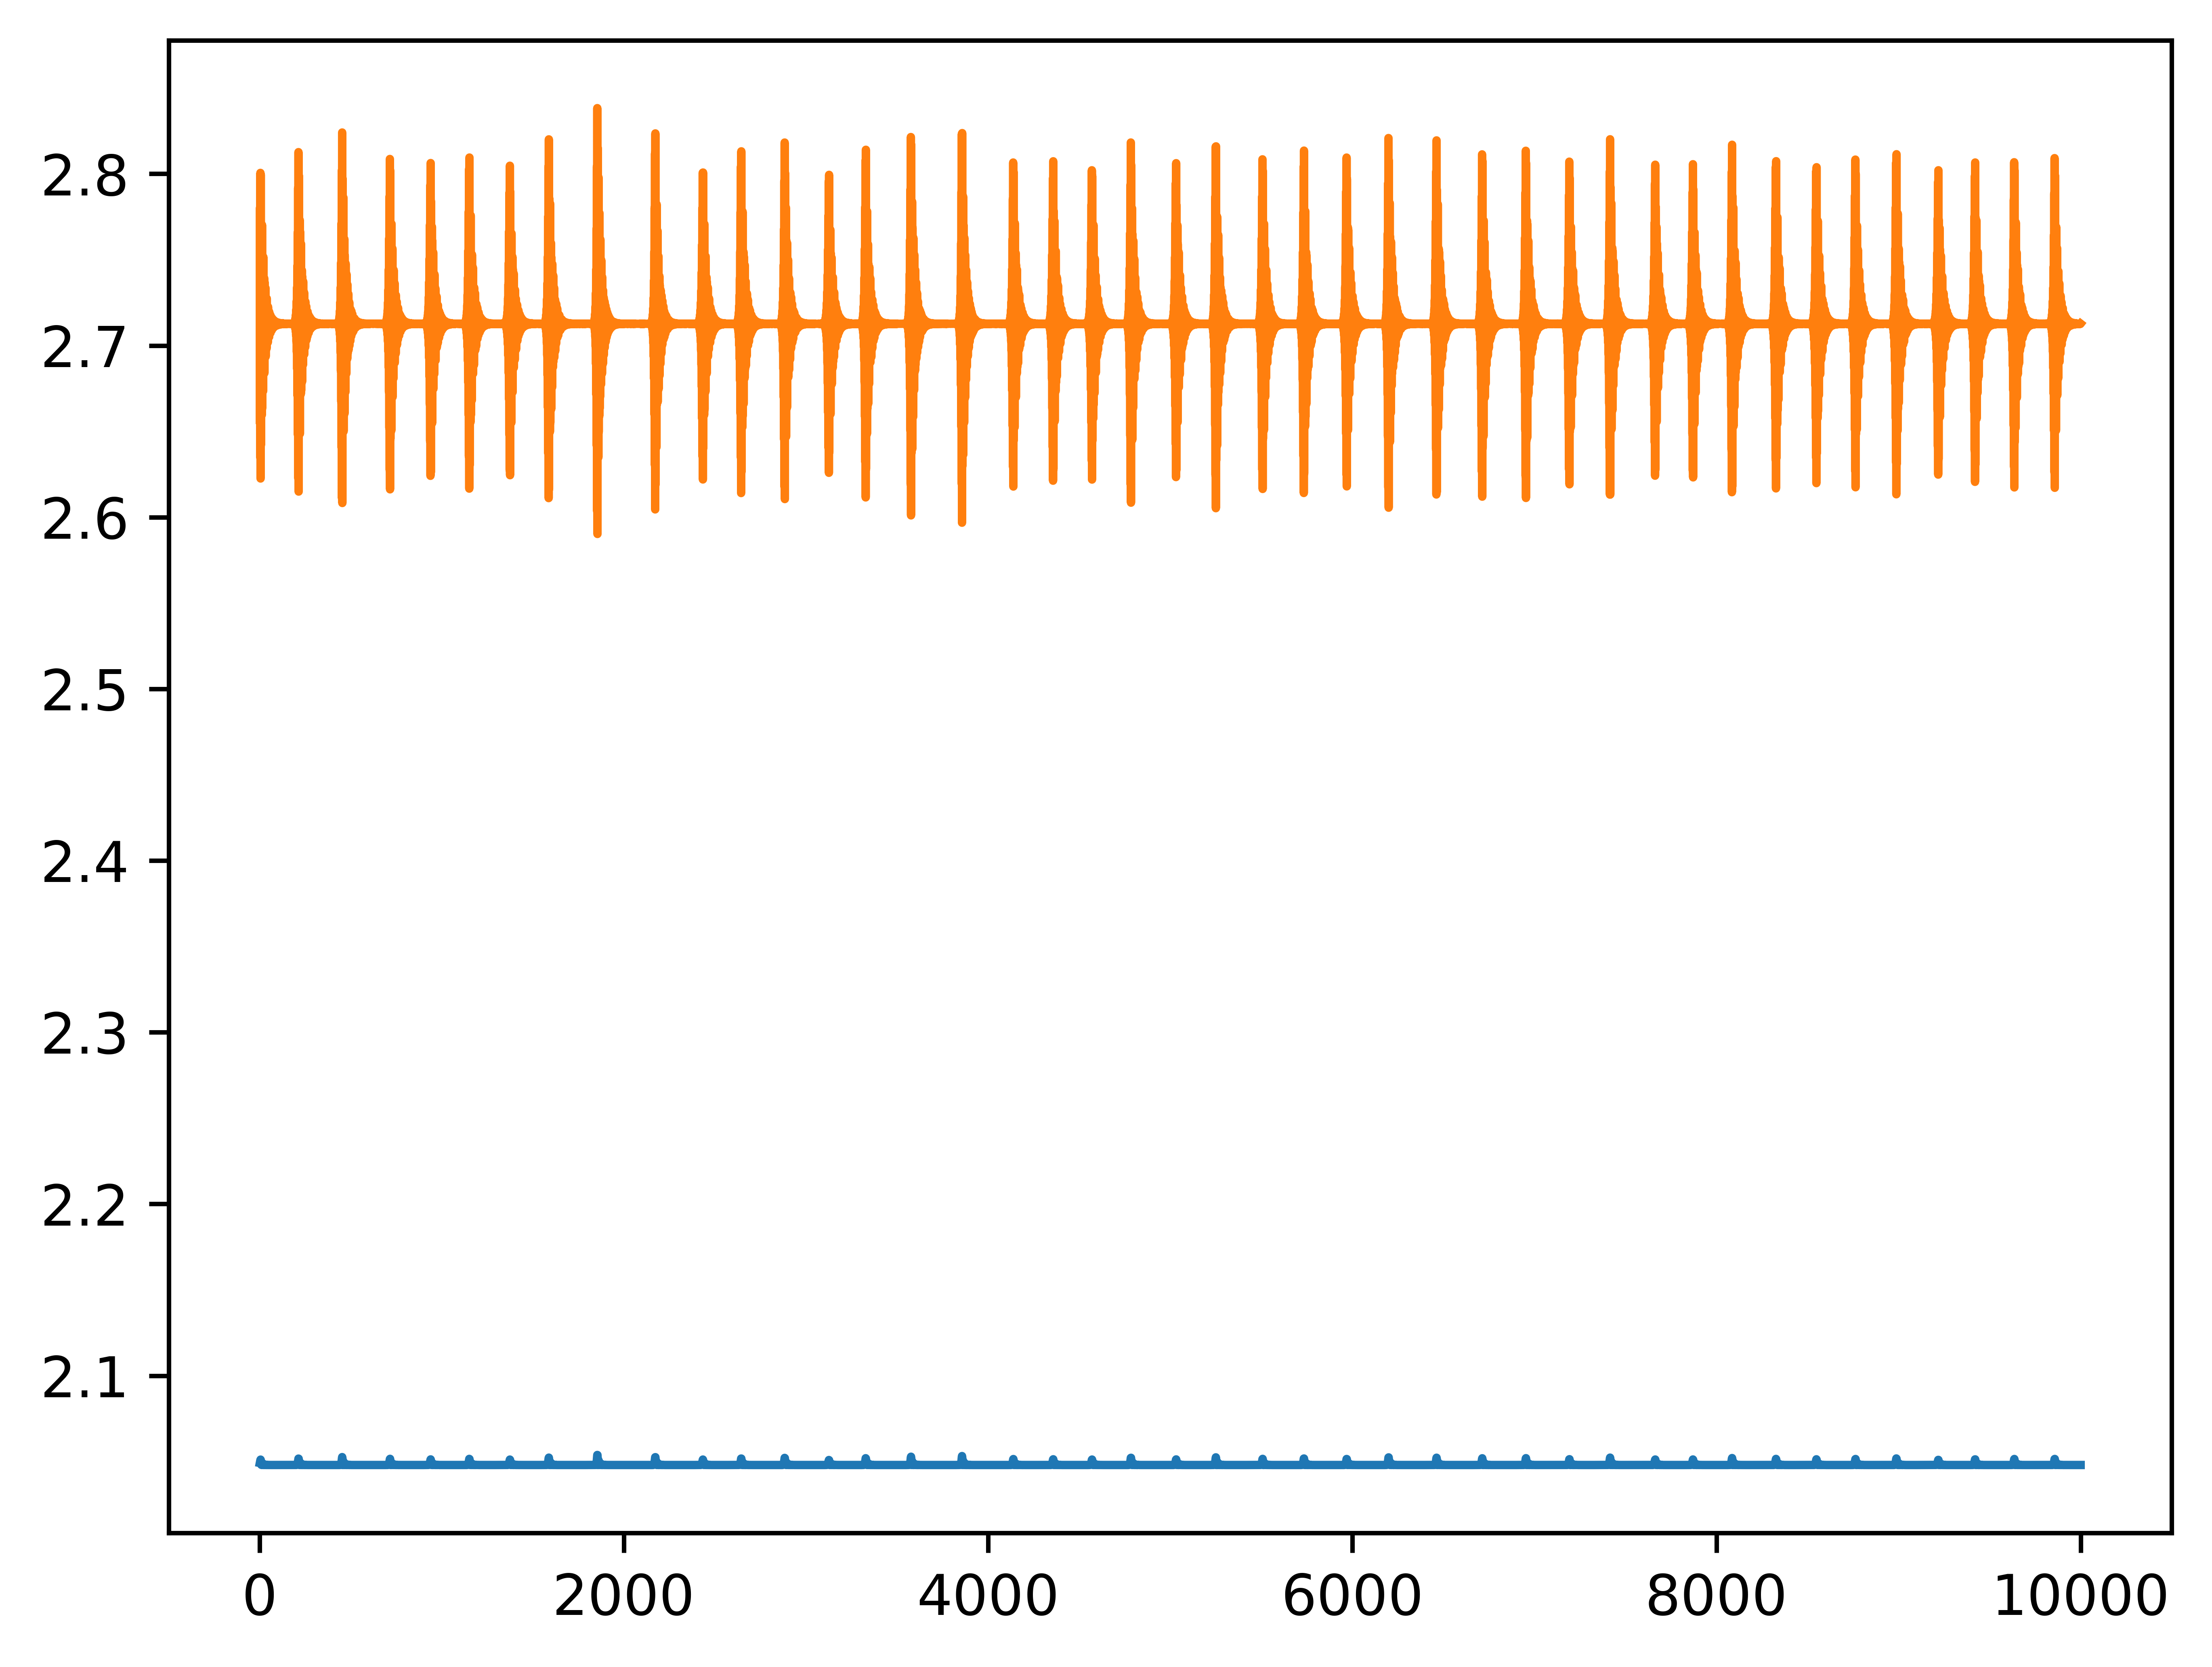

In [21]:
import matplotlib.pyplot as plt

plt.figure(dpi=1000)
plt.plot(range(1, 10001), [loss.detach().item() for loss in training_loss_list], label='train_loss')

plt.plot(range(1, 10001), [loss.detach().item() for loss in val_loss_list], label='val_loss')